## Introduction

La régression linéaire est l’un des principaux modèles à aborder en Machine Learning. À vrai dire, il n’existe pas qu’un seul type de régression. On distingue la régression de type linéaire mais aussi la régression logistique. Lors de ce tutoriel, nous n’aborderons que la régression linéaire en utilisant la bibliothèque d’apprentissage automatique Scikit-learn.

### Définition

Une régression a pour objectif d’expliquer une variable Y par le moyen d’une autre variable X. Par exemple, le salaire d’une personne peut être expliqué à travers son niveau universitaire ; c’est à dire le nombre d’années passées à l’université.

La régression linéaire est alors modélisée par l’équation linéaire suivante qui met en relation $X$ et $Y$ :

  $$ Y = \beta_0 + \beta_1 X + \varepsilon$$
  
  $\beta_0, \beta_1$ sont les paramètres du modèle ;
  
  $X$ est la variable explicative;
  
  $Y$ est la variable expliquée ;
  
  $\varepsilon$ est l’erreur de l’estimation.
  
  Puisqu’on a une seule variable explicative, alors on est dans le cas de la régression linéaire simple. Par conséquent, la régression linéaire multiple est lorsque vous avez au moins deux variables explicatives.


Un programme python simple qui implémente la régression linéaire sur un échantillon de données. Le programme utilise sklearn.linear_model de la bibliothèque scikit-learn pour importer la classe LinearRegression. L'objet de la classe est déclaré et est ajusté avec les données `X_Train` et `Y_Train`.
`Y_Pred` stocke les valeurs prédites de `X_Test`. Un graphique est tracé à l'aide de matplotlib.pyplot pour représenter visuellement le modèle de régression linéaire.


Prérequis:

- Installation de [Python3](https://www.python.org/downloads/release/python-373/);
- Installation de [Pandas](https://pypi.org/project/pandas/);
- Installation de [Numpy](https://numpy.org/)
- Installation de [scikit-learn](https://scikit-learn.org/stable/);
- La bibliothèque [Random](https://docs.python.org/3/library/random.html) fait partie des [bibliothèques standard](https://docs.python.org/3/library/) de python, nous n'avons donc pas besoin de l'installer, elle est déjà disponible pour nous.

## Un premier exemple d'implementation

Nous créerons un ensemble de données d'entraînement composé d'entiers pseudo-aléatoires en entrée en utilisant la bibliothèque Python [Random](https://docs.python.org/3/library/random.html), et nous créerons notre propre fonction pour la sortie de l'ensemble de données d'entraînement en utilisant ces valeurs entières aléatoires en entrée. Ensuite, nous entraînerons notre modèle sur l'ensemble de données nouvellement créé et, enfin, nous testerons notre modèle avec un exemple pour voir comment notre modèle a réussi à prédire/donner la sortie attendue.

[[0.86163819]] [0.64221598]


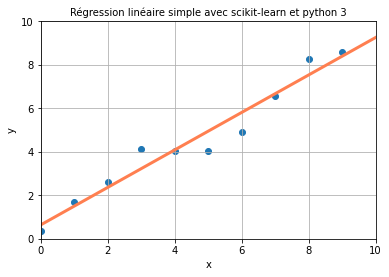

In [29]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Etape 1: jeux de données de formation

X = [i for i in range(10)]
Y = [random.gauss(x,0.75) for x in X]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)



#----------------------------------------------------------------------------------------#
# Etape 2: Instancier modèle d'entraînement 

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)



#----------------------------------------------------------------------------------------#
# Etape 3: Prédiction

x_new_min = 0.0
x_new_max = 10.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(0,10)

plt.title("Régression linéaire simple avec scikit-learn et python 3",fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.savefig("régression_linéaire simple.png", bbox_inches='tight')
plt.show()

## Un second exemple d'implementation

In [30]:
#Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Importation des jeux de données
#datasets = pd.read_csv('données-salaires.csv')
datasets = pd.read_csv('données-salaires.csv')

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

En général, si vous disposez d'un ensemble de données, vous souhaitez le diviser en `un ensemble de formation`, un `ensemble de validation` et un `ensemble de test`. 

In [32]:
# Division de l'ensemble de données en un ensemble d'entraînement(ou formation) et un ensemble de test.
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)


In [33]:
# Ajustement de la régression linéaire simple à l'ensemble de formation
from sklearn.linear_model import LinearRegression

# Instancier modèle
regressor = LinearRegression()

# Entraînement  du modèle
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [34]:
# Prédire le résultat de l'ensemble de test ￼
Y_Pred = regressor.predict(X_Test)
print(Y_Pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


### Les attributs du modèle LinearRegression

Les attributs du modèle LinearRegression simple sont :

`intercept_` : qui permet de calculer le paramètre $\beta_0$.

`coef_` : qui permet de calculer le paramètre $\beta_1$.


In [35]:
beta_0 = regressor.intercept_
beta_1 = regressor.coef_
print(beta_0, beta_1)

26816.192244031183 [9345.94244312]


On peut réaliser la même prévision sans avoir à faire appel à la méthode `predict()` et cela en ajoutant à `intercept_` appliquée au modèle la multiplication du `coef_` appliquée au modèle par X_Test. La seule différence entre la prévision ci-dessous et la prévision obtenue à l’aide de la méthode `precidt()` est que dans la première on a obtenu un tableau bidimensionnel et dans la deuxième on a un tableau à une seule dimension 

In [36]:
prediction = regressor.intercept_ + regressor.coef_*X_Test
print(prediction)

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]


In [37]:
print(prediction)


print("---------------------------------")


print(Y_Pred)

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]
---------------------------------
[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


On peut faire un petit test bouléen pour tester la précision de notre prédiction avec l'utilisation des paramètres du modèle.

In [38]:
for i in range(prediction.shape[0]):
    print(prediction[i][0] == Y_Pred[i])

True
True
True
True
True
True
True
True
True
True


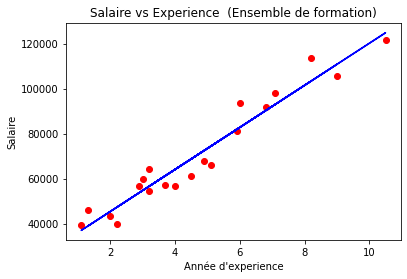

In [39]:
# Visualisation des résultats de l'ensemble d'entraînement
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salaire vs Experience  (Ensemble de formation)')
plt.xlabel("Année d'experience")
plt.ylabel('Salaire')
plt.show()

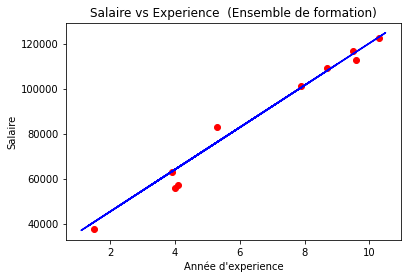

In [40]:
# Visualisation des résultats de l'ensemble des tests
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Salaire vs Experience  (Ensemble de formation)')
plt.xlabel("Année d'experience")
plt.ylabel('Salaire')
plt.show()

## Un cas pratique d'application

`Supposons que vous soyez le chef de direction d’une franchise de camions ambulants (Food Trucks). Vous envisagez différentes villes pour ouvrir un nouveau point de vente. La chaîne a déjà des camions dans différentes villes et vous avez des données pour les bénéfices et les populations des villes. Vous souhaitez utiliser ces données pour vous aider à choisir la ville pour y ouvrir un nouveau point de vente.`


Ce problème est de type apprentissage supervisé modélisable par un algorithme de régression linéaire. Il est de type supervisé car pour chaque ville ayant un certain nombre de population (variable prédictive X), on a le gain effectué dans cette dernière (la variable qu’on cherche à prédire : Y).

In [41]:
# chargement de bibliothéques 
import pandas as pd

In [42]:
# chargement du jeu de données
df = pd.read_csv("ensemble-de-données-de-régression-linéaire.csv")

In [43]:
X = df.iloc[:, :-1].values  #selection de la première colonne de notre dataset
Y = df.iloc[:, 1].values   #selection de la première colonne de notre dataset

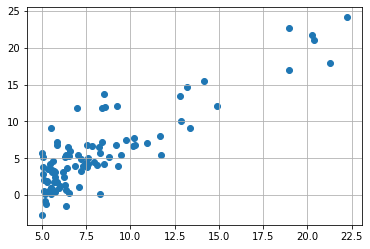

In [44]:
### Visualisation du jeu de données

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

In [45]:
# Division de l'ensemble de données en un ensemble d'entraînement(ou formation) et un ensemble de test.
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Ajustement de la régression linéaire simple à l'ensemble de formation
from sklearn.linear_model import LinearRegression

# Instancier modèle
regressor = LinearRegression()



In [46]:
# Entraînement  du modèle
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [47]:
# Prédire le résultat de l'ensemble de test ￼
Y_Pred = regressor.predict(X_Test)
print(Y_Pred)

[ 8.94195531  6.10107029  4.33817991  3.48933772 19.86861533  3.58423571
  2.15715616  2.13107377  3.58796177  8.10242826  3.55757112  2.07483361
  3.17728051  2.75169502  3.73618895  3.85635426  3.54976969 18.24312328
  5.74464972  2.06924452  5.29472842 13.54247042  3.00681343  3.17239006
  2.08740905  2.63630371  6.17198179  2.51439181  2.22504025  4.9615957
  2.21444428  2.85474376]


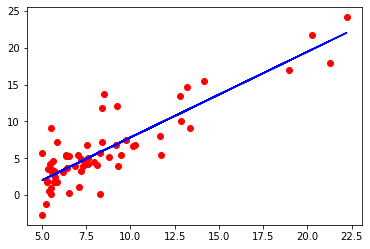

In [48]:
# Visualisation des résultats de l'ensemble d'entraînement
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
#plt.title('Salaire vs Experience  (Ensemble de formation)')
#plt.xlabel("Année d'experience")
#plt.ylabel('Salaire')
plt.show()

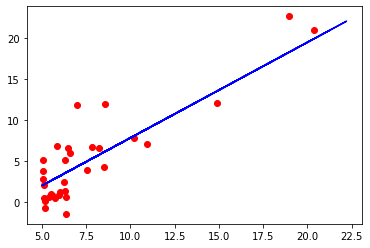

In [49]:
# Visualisation des résultats de l'ensemble des tests
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
#plt.title('Salaire vs Experience  (Ensemble de formation)')
#plt.xlabel("Année d'experience")
#plt.ylabel('Salaire')
plt.show()

## Un aperçu de la régression linéaire multiple 

Rappelez-vous qu'une fonction généralement appelée " f " prend une valeur d'entrée/paramètre généralement appelée " x " et produit une valeur de sortie, telle que f(x) = g. La fonction que je vais créer prendra plusieurs paramètres, donc pas seulement " x " mais " x ", " y " et " z ", de sorte que nous obtenions la fonction suivante:

`f(x,y,z) = 10x + 2y + 3z = g`


Entrée = Caractéristiques
Sortie = Cibles

In [50]:
#Code pour générer un ensemble de formation :

# Importez les bibliothèques
import random               # pour generer des entiers pseudo-aléatoires          
from sklearn.linear_model import LinearRegression  # pour charger le modele
import matplotlib.pyplot as plt             # Pour visualiser


# Créer une liste vide pour l'ensemble de données caractéristiques 'X' et l'ensemble de données cibles 'Y'.
feature_set = ens_caracteristiques = []
target_set= ens_cibles = []


# Obtenir le nombre de lignes souhaité pour l'ensemble de données
number_of_rows = nombre_de_lignes = 200


# Limiter les valeurs possibles dans l'ensemble des données
random_number_limit = nombre_limite_aléatoire = 2000

# Créer l'ensemble de données de formation
# Créer et annexer un ensemble de données générées aléatoirement à l'entrée et à la sortie.
for i in range(0,number_of_rows):
  x = random.randint(0, random_number_limit)
  y = random.randint(0, random_number_limit)
  z = random.randint(0, random_number_limit)
  
  
# Créer une fonction linéaire pour l'ensemble de données cible 'Y'.
fonction = (10*x) + (2*y) + (3*z)
feature_set.append([x,y,z])  # ens_caracteristiques.append([x,y,z])
target_set.append(fonction)  # ens_cibles.append(fonction)

####  Entraîner notre modèle de régression linéaire

Nous utiliserons la méthode LinearRegression() de la bibliothèque Python scikit-learn pour entraîner et créer notre modèle. Ce modèle va essayer de "modéliser" la fonction que nous avons créée pour l'ensemble de données d'entraînement.

Remarque : lorsque nous "modélisons" une fonction, il s'agit simplement d'un autre terme pour désigner l'entraînement.




In [51]:
model = LinearRegression() # Créer un objet/modèle de régression linéaire

model.fit(feature_set, target_set) 

LinearRegression()

#### Tester le modèle de régression linéaire

In [52]:
ens_test =  [[8, 10, 0]]

# Le résultat devrait être 8*10 + 10*2 + 0*3 = 100. Voyons ce que nous avons obtenu...


In [53]:
ens_test  = [[8,10,10]] 
prediction = model.predict(ens_test)
print('Prediction:'+str(prediction)+'\t'+ 'Coefficient:'+str(model.coef_))

Prediction:[21418.]	Coefficient:[0. 0. 0.]


Le modèle utilise les données d'apprentissage pour calculer les coefficients, également appelés poids. Il a ensuite utilisé les poids avec les caractéristiques/ données d'entrée pour calculer la sortie correcte. En donnant au modèle des données de test, il a réussi à obtenir la bonne réponse!